## Import package yang digunakan

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

## Upload File

In [21]:
from google.colab import files
upload = files.upload()

Saving student_lifestyle_dataset.csv to student_lifestyle_dataset (1).csv


In [22]:
df = pd.read_csv('student_lifestyle_dataset.csv', sep=',')
print(df)

      Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0              1                  6.9                            3.8   
1              2                  5.3                            3.5   
2              3                  5.1                            3.9   
3              4                  6.5                            2.1   
4              5                  8.1                            0.6   
...          ...                  ...                            ...   
1995        1996                  6.5                            0.2   
1996        1997                  6.3                            2.8   
1997        1998                  6.2                            0.0   
1998        1999                  8.1                            0.7   
1999        2000                  9.0                            1.7   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
0                     8.7                   2.8   
1                     8.0        

In [23]:
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


# EDA

In [24]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [26]:
df.duplicated().sum()


0

In [27]:
# Check for missing values
print(df.isnull().sum())

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64


In [28]:
# Check class distribution
print(df['Stress_Level'].value_counts())

# Calculate the percentage of each class
class_percentages = df['Stress_Level'].value_counts(normalize=True) * 100
print("\nPercentage of each class:")
class_percentages

Stress_Level
High        1029
Moderate     674
Low          297
Name: count, dtype: int64

Percentage of each class:


,proportion
Stress_Level,
High,51.45
Moderate,33.70
Low,14.85


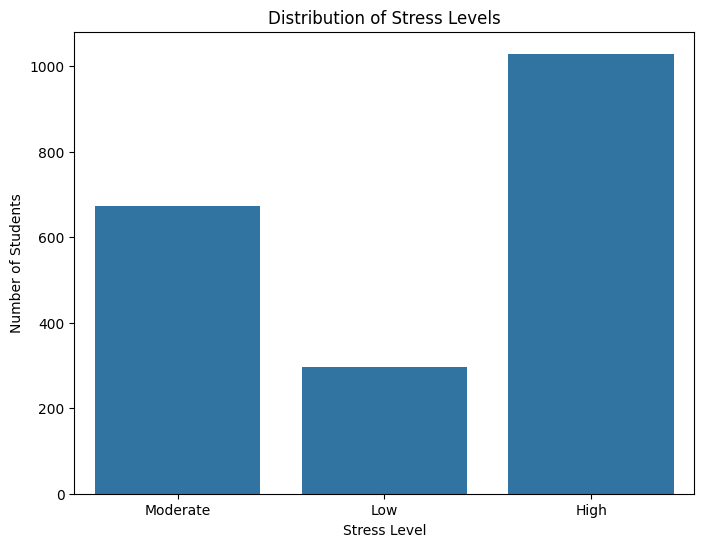

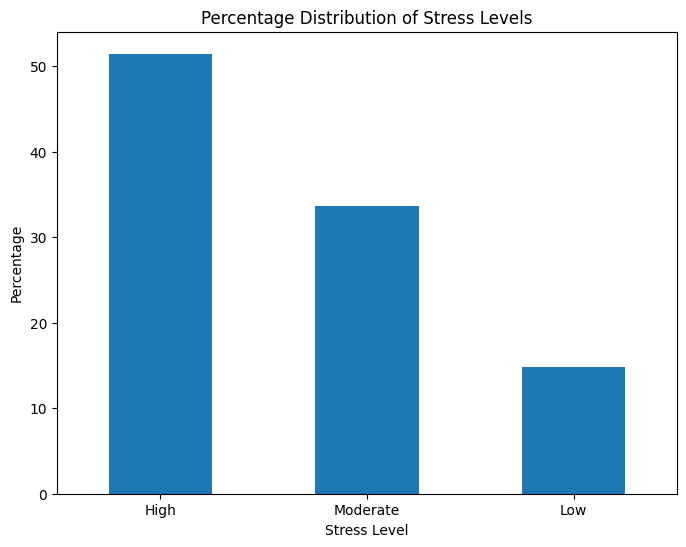

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Stress_Level', data=df)
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Number of Students')
plt.show()

# Visualize class distribution as percentages
plt.figure(figsize=(8, 6))
class_percentages.plot(kind='bar')
plt.title('Percentage Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Prevent x-axis labels from overlapping
plt.show()

# Data Pre processing

## Melakukan label encoding

In [30]:
# prompt: label encoding untuk data kategorikal

from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Kolom-kolom kategorikal yang akan di-encode
categorical_cols = ['Stress_Level']

# Melakukan label encoding untuk setiap kolom kategorikal
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Menampilkan DataFrame setelah label encoding
print(df.head())

   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA  Stress_Level  
0  2.99             2  
1  2.75             1  
2  2.67             1  
3 

Stress_Level
2    1029
1    1029
0    1029
Name: count, dtype: int64


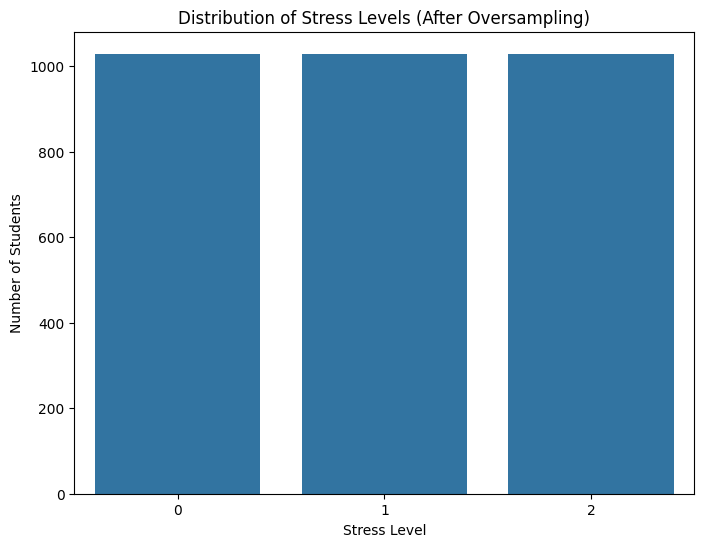

In [31]:
from imblearn.over_sampling import SMOTE

# Pisahkan fitur (X) dan target (y)
X = df.drop('Stress_Level', axis=1)
y = df['Stress_Level']

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Lakukan oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Buat DataFrame baru dari data yang telah di-resample
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Stress_Level'] = y_resampled

# Tampilkan distribusi kelas setelah oversampling
print(df_resampled['Stress_Level'].value_counts())

# Visualisasi distribusi kelas setelah oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Stress_Level', data=df_resampled)
plt.title('Distribution of Stress Levels (After Oversampling)')
plt.xlabel('Stress Level')
plt.ylabel('Number of Students')
plt.show()

                           Feature  Importance
1              Study_Hours_Per_Day    0.635088
3              Sleep_Hours_Per_Day    0.155254
6                              GPA    0.118951
5  Physical_Activity_Hours_Per_Day    0.043301
4             Social_Hours_Per_Day    0.020112
0                       Student_ID    0.013852
2    Extracurricular_Hours_Per_Day    0.013443


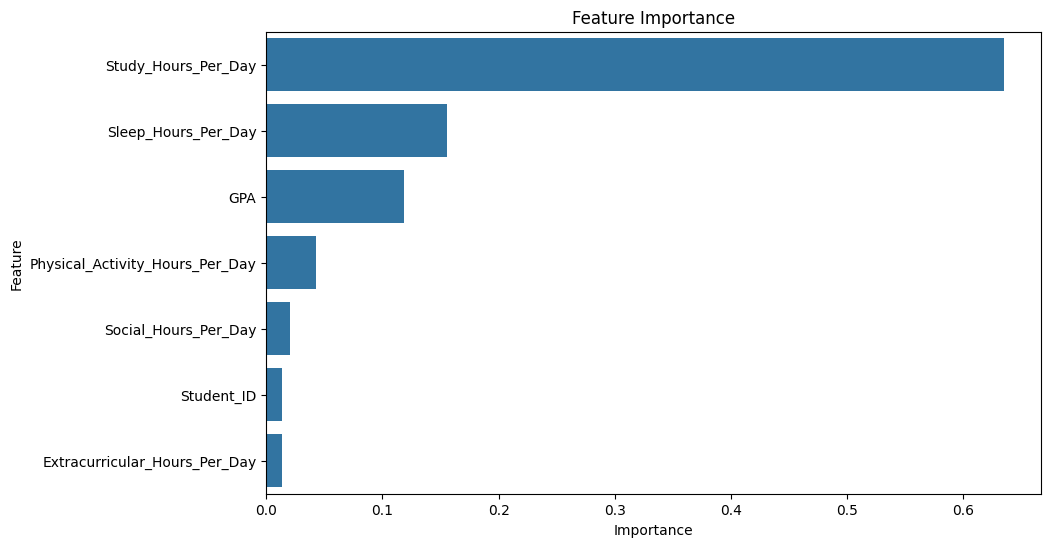

In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [33]:
df.columns

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

In [35]:
df_resampled = df_resampled.drop(['Student_ID','Extracurricular_Hours_Per_Day','Physical_Activity_Hours_Per_Day'], axis=1)

In [36]:
# Check setelah menghapus fitur
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3087 entries, 0 to 3086
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Study_Hours_Per_Day   3087 non-null   float64
 1   Sleep_Hours_Per_Day   3087 non-null   float64
 2   Social_Hours_Per_Day  3087 non-null   float64
 3   GPA                   3087 non-null   float64
 4   Stress_Level          3087 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 120.7 KB


# Penerapan model Machine learning

In [39]:
X = df_resampled.drop(columns='Stress_Level')  # Fitur-fitur numerik yang sudah di-scaling
y = df_resampled['Stress_Level']  # Variabel target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% data training, 20% data testing

## Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators = jumlah pohon di forest
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
# Evaluate the model on the training data
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Akurasi pada data training: {train_accuracy}')
print(classification_report(y_train, y_train_pred))

Akurasi pada data training: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       819
           1       1.00      1.00      1.00       833
           2       1.00      1.00      1.00       817

    accuracy                           1.00      2469
   macro avg       1.00      1.00      1.00      2469
weighted avg       1.00      1.00      1.00      2469



In [44]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')
print(classification_report(y_test, y_pred))

Akurasi: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       196
           2       1.00      1.00      1.00       212

    accuracy                           1.00       618
   macro avg       1.00      1.00      1.00       618
weighted avg       1.00      1.00      1.00       618



## KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier

In [46]:
model = KNeighborsClassifier(n_neighbors=5)  # Buat model KNN dengan 5 tetangga terdekat
# Anda dapat mencoba nilai n_neighbors yang berbeda untuk tuning model.
model.fit(X_train, y_train)  # Latih model dengan data training

KNeighborsClassifier()

In [47]:
y_pred = model.predict(X_test)  # Prediksi pada data testing
accuracy = accuracy_score(y_test, y_pred)  # Hitung akurasi
print(f'Akurasi: {accuracy}')
print(classification_report(y_test, y_pred))  # Tampilkan laporan klasifikasi

Akurasi: 0.9563106796116505
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       210
           1       0.95      0.98      0.97       196
           2       0.97      0.92      0.94       212

    accuracy                           0.96       618
   macro avg       0.96      0.96      0.96       618
weighted avg       0.96      0.96      0.96       618



## SVM


In [48]:
from sklearn.svm import SVC  # Import SVC dari sklearn.svm

In [49]:
model = SVC(kernel='linear', C=1)  # Buat model SVM dengan kernel linear dan C=1
# Anda dapat mencoba kernel lain seperti 'rbf', 'poly', atau 'sigmoid'
# dan menyesuaikan nilai C untuk tuning model.
model.fit(X_train, y_train)  # Latih model dengan data training

SVC(C=1, kernel='linear')

In [50]:
y_pred = model.predict(X_test)  # Prediksi pada data testing
accuracy = accuracy_score(y_test, y_pred)  # Hitung akurasi
print(f'Akurasi: {accuracy}')
print(classification_report(y_test, y_pred))  # Tampilkan laporan klasifikasi

Akurasi: 0.8883495145631068
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       210
           1       0.97      0.98      0.98       196
           2       0.90      0.81      0.85       212

    accuracy                           0.89       618
   macro avg       0.89      0.89      0.89       618
weighted avg       0.89      0.89      0.89       618

